# ImageLoading And CNN
이미지를 로딩하는 법과 CNN 에 대해서 알아보겠습니다. 런타임이 GPU로 설정되었는지 꼭 확인하고 시작하시길 바랍니다.

## Imagemagick 설치
이미지를 다루는데 있어서 여러가지 툴 중에 추천드리는 프로그램입니다.

In [1]:
%%bash
apt install -y imagemagick


Reading package lists...
Building dependency tree...
Reading state information...
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 예제 Image 다운로드
Flower 이미지를 다운로드합니다.

In [2]:
%%bash
[ ! -f flower_photos_300x200_small_train_test2.zip ]&& wget https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/flower_photos_300x200_small_train_test2.zip

rm -rf __MACOSX
rm -rf flowers
unzip -q flower_photos_300x200_small_train_test2.zip
mv flower_photos_300x200_small_train_test2 flowers

cd flowers
# files=$(find |grep "\.jpg$\|\.png$")
# for i in $files; do
#     # convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -colorspace Gray    ${i%.*}.png
#     convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -define png:color-type=2   ${i%.*}.png

#     # identify ${i%.*}.png
#     rm -f $i
# done

find .|grep .DS_Store|xargs rm -f
find .|head -n 10

.
./train
./train/tulip
./train/tulip/7166554924_432aaae4b2_n.jpg
./train/tulip/8713387500_6a9138b41b_n.jpg
./train/tulip/17844723633_da85357fe3.jpg
./train/tulip/6958243974_8851425ddb_n.jpg
./train/tulip/5813495998_64be1b8ab6_n.jpg
./train/tulip/17282288501_e8738c9cfb_n.jpg
./train/tulip/142235017_07816937c6.jpg


## Image Resize
Image 데이터의 경우 크기가 들쭉날쭉하게 들어오게 될 가능성이 높습니다. 그러므로 하나의 사이즈로 통일을 해주는 전처리 작업이 필요합니다.

In [3]:
from os import listdir
from os.path import isfile, join
import cv2
def getFolder(thePath,isFile=True):
  return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]

def convert(thePath,to_w,to_h):
  print(thePath) # 향후 OpenCV로 이미지 변환하는 부분
  img=cv2.imread(thePath)
  img=cv2.resize(img,(to_w,to_h))
  cv2.imwrite(thePath,img)

def convertAll(tPath,to_w,to_h):
  for folder in getFolder(tPath,False):
    print('-',folder)
    convertAll(join(tPath,folder),to_w,to_h)
  for files in getFolder(tPath,True):
    convert(join(tPath,files),to_w,to_h)
w=300
h=200
convertAll('/content/flowers',w,h)


- train
- tulip
/content/flowers/train/tulip/7166554924_432aaae4b2_n.jpg
/content/flowers/train/tulip/8713387500_6a9138b41b_n.jpg
/content/flowers/train/tulip/17844723633_da85357fe3.jpg
/content/flowers/train/tulip/6958243974_8851425ddb_n.jpg
/content/flowers/train/tulip/5813495998_64be1b8ab6_n.jpg
/content/flowers/train/tulip/17282288501_e8738c9cfb_n.jpg
/content/flowers/train/tulip/142235017_07816937c6.jpg
/content/flowers/train/tulip/7094415739_6b29e5215c_m.jpg
/content/flowers/train/tulip/16717320956_d4b00807f2.jpg
/content/flowers/train/tulip/17202535346_ab828e779b.jpg
/content/flowers/train/tulip/16282277874_b92776b194.jpg
/content/flowers/train/tulip/2249756775_02e693beda_n.jpg
/content/flowers/train/tulip/14097745904_436c4ba1b4_n.jpg
/content/flowers/train/tulip/7448453762_aea8739f1b.jpg
/content/flowers/train/tulip/14266093711_66d18a1e44_n.jpg
/content/flowers/train/tulip/3626132563_d955973447_n.jpg
/content/flowers/train/tulip/2333321040_3960b9d67e_n.jpg
/content/flowers/trai

위의 작업 후 Image 를 확인해 보시면 300x200 사이즈로 잘 처리된 것을 확인하실 수 있습니다.

In [4]:
!identify /content/flowers/train/daisy/4286053334_a75541f20b_m.jpg


/content/flowers/train/daisy/4286053334_a75541f20b_m.jpg JPEG 300x200 300x200+0+0 8-bit sRGB 16.3KB 0.000u 0:00.000


tip. 폴더 리스트와 파일리스트를 가져오는 법은 아래와 같습니다.

In [5]:
getFolder('/content/flowers/',False) # folder list
# getFolder('/content/flowers/test/daisy',True) # file list


['train', 'test']

위의 리사이즈 방법 예시를 좀 더 보기 편하게 포현을 해보면 아래와 같습니다.

In [6]:
# import os
# def convert(thePath,to_w,to_h):
#   print(thePath) # 향후 OpenCV로 이미지 변환하는 부분
#   img=cv2.imread(thePath)
#   img=cv2.resize(img,(to_w,to_h))
#   cv2.imwrite(thePath,img)

# img_list=[i for i in os.walk('/content/flowers')]

# for t in img_list:
#   path=t[0]
#   for f in t[2]:
#     print(join(path,f))
#     convert(join(path,f),400,300)



## ImageDataGenerator
ImageDataGenerator 를 통해 트레이닝, 테스트 데이터를 만들어 줄 수 있다. 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator()

flow_from_directory 라는 함수를 사용하여 폴더 형태로된 데이터 구조를 바로 가져와서 사용할 수 있다.

In [8]:
# help(datagen.flow_from_directory)
train_data=datagen.flow_from_directory(
    '/content/flowers/train',
    target_size=(h, w),
    batch_size=32,
    class_mode="categorical"
)
test_data=datagen.flow_from_directory(
    '/content/flowers/test',
    target_size=(h, w),
    batch_size=32,
    class_mode="categorical"
)

Found 165 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


훈련 데이터를 확인해 보면 위에서 설정한 파라미터들이 들어간 것을 확인할 수 있다.

In [9]:
# dir(train_data)
len(set(train_data.classes))

2

In [10]:
train_data.classes[0]

0

In [11]:
train_data.filepaths[0]

'/content/flowers/train/daisy/105806915_a9c13e2106_n.jpg'

In [12]:
train_data.image_shape

(200, 300, 3)

직접 이미지를 띄워서 보는 것도 가능하다<br>(ctrl+enter 로 실행하면 계속 다음 이미지를 확인해볼 수 있다.)


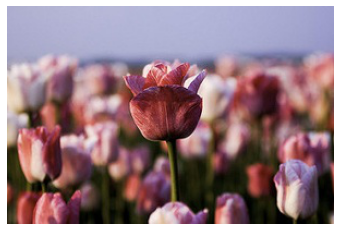

In [13]:
import matplotlib.pyplot as plt

images,labels=train_data.next()
# images[0]/255
plt.axis(False)
plt.imshow(images[0]/255)


## CNN 모델 만들기
위의 전처리 된 이미지를 가지고 훈련할 모델을 만들어 보자.

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(h,w, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 209024)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

훈련시키기

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# dir(model)
#model.fit(train_images, train_labels, epochs=100,callbacks=[tensorboard_callback])
model.fit_generator(train_data, 
                    validation_data=test_data, 
                    validation_steps=8,
                    epochs=100
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


6/6 [==============================] - 5s 231ms/step - loss: 431.5368 - accuracy: 0.4364 - val_loss: 14.3570 - val_accuracy: 0.4857
Epoch 2/100
6/6 [==============================] - 0s 72ms/step - loss: 4.3865 - accuracy: 0.4970
Epoch 3/100
6/6 [==============================] - 0s 74ms/step - loss: 5.8834 - accuracy: 0.5030
Epoch 4/100
6/6 [==============================] - 0s 89ms/step - loss: 0.6890 - accuracy: 0.4970
Epoch 5/100
6/6 [==============================] - 0s 76ms/step - loss: 0.7055 - accuracy: 0.4970
Epoch 6/100
6/6 [==============================] - 0s 71ms/step - loss: 0.6854 - accuracy: 0.4970
Epoch 7/100
6/6 [==============================] - 0s 74ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 8/100
6/6 [==============================] - 0s 87ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 9/100
6/6 [==============================] - 0s 72ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 10/100
6/6 [==============================] - 0s 83ms/step - loss: 0.6932 - ac

위의 모델로 score 를 확인해 보자.

In [17]:
# score = model.evaluate(test_images, test_labels, verbose=0)
score = model.evaluate_generator(test_data,steps=60)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss: 0.6930501461029053
Test accuracy: 0.5142857432365417


In [18]:
# cf) https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/